# Titanic
[View Poject on Kaggle](https://www.kaggle.com/c/titanic)

[View Details on Medium](https://medium.com/@ryan.han)

### Import Tools

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### Load Training and Testing Data

In [2]:
data_dir = './'

def load_data(data_dir):
    train = pd.read_csv(data_dir + 'train.csv')
    test = pd.read_csv(data_dir + 'test.csv')
    return train, test

train, test = load_data(data_dir)

### View Data

In [3]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(train.shape)

(891, 12)


In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [6]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Discovery
* More than half of the passengers did not survive
* Null entries in age column
* Most passengers belong to the third class
* The passengers are relatively young, but there exists both senior citizens and children

### Examine Data Correlation 

#### Sex

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object


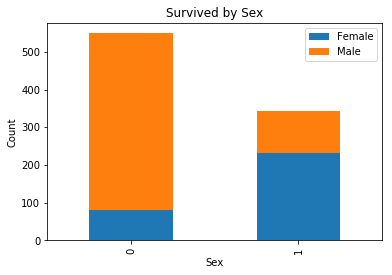

In [7]:
print (train['Sex'][:10])
Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()

df=pd.DataFrame({'Male':Survived_m, 'Female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title('Survived by Sex')
plt.xlabel('Sex') 
plt.ylabel('Count')
plt.show()


#### Age

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


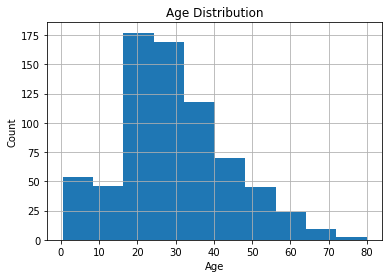

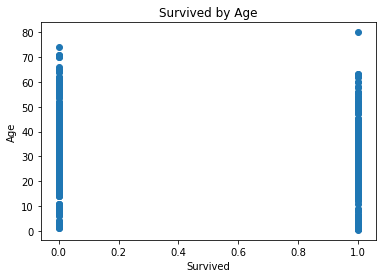

In [8]:
print (train['Age'][:10])
train['Age'].hist()  
plt.ylabel('Count') 
plt.xlabel('Age') 
plt.title('Age Distribution')
plt.show()  

plt.scatter(train['Survived'], train['Age'])
plt.ylabel('Age') 
plt.xlabel('Survived') 
plt.title('Survived by Age')
plt.show()


#### Ticket Price

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64


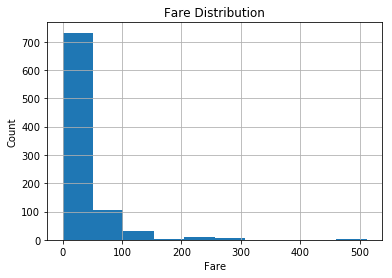

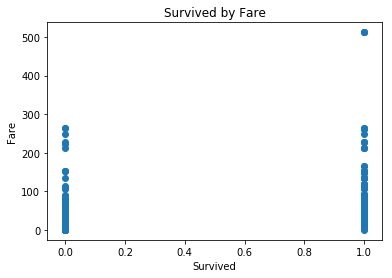

In [9]:
print (train['Fare'][0:10])
train['Fare'].hist()  
plt.ylabel('Count') 
plt.xlabel('Fare') 
plt.title('Fare Distribution')
plt.show()  

plt.scatter(train['Survived'], train['Fare'])
plt.ylabel('Fare') 
plt.xlabel('Survived') 
plt.title('Survived by Fare')
plt.show()


#### Passenger Class

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64


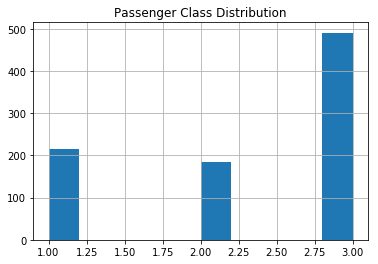

   First Class  Second Class  Third Class
0           80            97          372
1          136            87          119


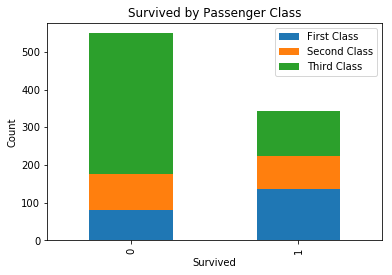

In [10]:
print (train['Pclass'][0:10])
train['Pclass'].hist()  
plt.title('Passenger Class Distribution')
plt.show()  

Survived_p1 = train.Survived[train['Pclass'] == 1].value_counts()
Survived_p2 = train.Survived[train['Pclass'] == 2].value_counts()
Survived_p3 = train.Survived[train['Pclass'] == 3].value_counts()

df=pd.DataFrame({'First Class':Survived_p1, 'Second Class':Survived_p2, 'Third Class':Survived_p3})
print(df)
df.plot(kind='bar', stacked=True)
plt.title('Survived by Passenger Class')
plt.xlabel('Survived') 
plt.ylabel('Count')
plt.show()


#### Embarked Location

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object
0    427
1    217
Name: Survived, dtype: int64


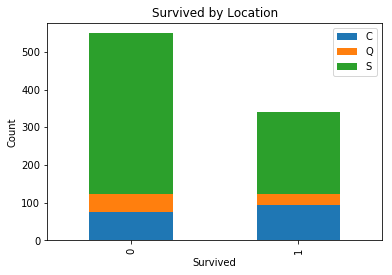

In [11]:
print (train['Embarked'][0:10])

Survived_S = train.Survived[train['Embarked'] == 'S'].value_counts()
Survived_C = train.Survived[train['Embarked'] == 'C'].value_counts()
Survived_Q = train.Survived[train['Embarked'] == 'Q'].value_counts()

print(Survived_S)
df = pd.DataFrame({'S':Survived_S, 'C':Survived_C, 'Q':Survived_Q})
df.plot(kind='bar', stacked=True)
plt.title('Survived by Location')
plt.xlabel('Survived') 
plt.ylabel('Count')
plt.show()


### Remove Unwanted Features

In [12]:
label = train.loc[:,'Survived']
new_train = train.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
new_test = test.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

print(new_train.shape)
print(new_test.shape)

(891, 5)
(418, 5)


### Data Preprocessing

#### Misssing Data

In [13]:
feature_list = ['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']
for feature in (feature_list):
    if(train[feature].isnull().values.any() or test[feature].isnull().values.any()):
        print(feature + ' has null value(s)')

Age has null value(s)
Fare has null value(s)
Embarked has null value(s)


In [14]:
def fill_NAN(data):  
    data_copy = data.copy(deep=True)
    data_copy.loc[:,'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:,'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:,'Embarked'] = data_copy['Embarked'].fillna('S')
    return data_copy


train_no_nan = fill_NAN(new_train)
test_no_nan = fill_NAN(new_test)

print(train_no_nan.isnull().values.any())    
print(test_no_nan.isnull().values.any())    

False
False


#### Normalization

In [15]:
def normalize(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Sex'] == 'female', 'Sex'] = 0
    data_copy.loc[data_copy['Sex'] == 'male', 'Sex'] = 1
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy


normalized_train = normalize(train_no_nan)
normalized_test = normalize(test_no_nan)
print(normalized_train.head())
print(normalized_test.head())

   Pclass Sex   Age     Fare Embarked
0       3   1  22.0   7.2500        0
1       1   0  38.0  71.2833        1
2       3   0  26.0   7.9250        0
3       1   0  35.0  53.1000        0
4       3   1  35.0   8.0500        0
   Pclass Sex   Age     Fare Embarked
0       3   1  34.5   7.8292        2
1       3   0  47.0   7.0000        0
2       2   1  62.0   9.6875        2
3       3   1  27.0   8.6625        0
4       3   0  22.0  12.2875        0


### Cross Validation to Find the Best K

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k = 1, score = [ 0.62011173  0.67597765  0.70224719  0.69662921  0.70621469], mean = 0.680236095847
k = 2, score = [ 0.61452514  0.7150838   0.70786517  0.69662921  0.66101695], mean = 0.679024053945
k = 3, score = [ 0.66480447  0.68156425  0.71910112  0.74157303  0.70621469], mean = 0.702651512331
k = 4, score = [ 0.63128492  0.69273743  0.69101124  0.68539326  0.70621469], mean = 0.681328306003
k = 5, score = [ 0.63687151  0.66480447  0.69662921  0.70224719  0.71186441], mean = 0.682483357786
k = 6, score = [ 0.60335196  0.70391061  0.69101124  0.6741573   0.74576271], mean = 0.683638764205
k = 7, score = [ 0.62569832  0.72067039  0.70786517  0.70224719  0.75706215], mean = 0.702708644305
k = 8, score = [ 0.61452514  0.68715084  0.70786517  0.70786517  0.71751412], mean = 0.686984087805
k = 9, score = [ 0.61452514  0.68715084  0.71348315  0.73595506  0.73446328], mean = 0.697115491347
k = 10, score = [ 0.61452514  0.70391061  0.71348315  0.71348315  0.75706215], mean = 0.700492838643

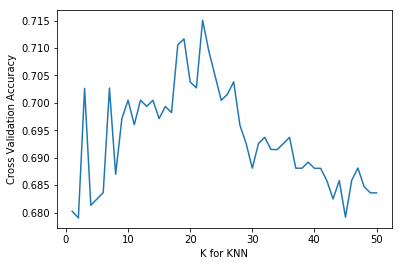

22

In [17]:
def cross_validation(k):
    k_scores = []
    for k in range(1,k+1):
        knn=KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, normalized_train, label, cv = 5, scoring='accuracy')
        print("k = " + str(k) + ", score = " + str(scores) + ", mean = " +  str(scores.mean()))
        k_scores.append(scores.mean())
        
    plt.plot(range(1, k+1), k_scores)
    plt.xlabel('K for KNN')
    plt.ylabel('Cross Validation Accuracy')
    plt.show()
    
    max = 0
    ans = 0
    for index, score in enumerate(k_scores):
        if score > max:
            max = score
            ans = index
    return ans + 1  

cross_validation(50)

### Predict

In [18]:
clf = KNeighborsClassifier(n_neighbors=22)
clf.fit(normalized_train, label)
result=clf.predict(normalized_test)

In [19]:
print(result)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


### Save Results to File

In [20]:
df = pd.DataFrame({"PassengerId": test['PassengerId'],"Survived": result})
df.to_csv('Submission.csv',header=True, index=False)

### Kaggle Result

The Kaggle score for this project is 0.66507